![Air India](http://media.indiatimes.in/media/content/2016/Mar/air-india_52%201_1457182133.jpg)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

airtrafficcoordinatesindia
international-air-traffic-from-and-to-india



# We are dealing with only passenger related data which means we will omit all freight details in this kernel.


Let's look at the top 20 airlines that fly in and out of India
1. JET Airways and AIR INDIA are the undisputed leaders in international flights
2. Emirates comes a close third. Top 4 operators make up 50 % of the total share.
3. The top 10 operators is dominated by middle east flight operators.



,AIRLINE NAME,TO COUNT,FROM COUNT,TOTAL TRAFFIC,OUTBOUND TO INBOUND RATIO
0,JET AIRWAYS,8320544.0,8471096,16791640.0,1.018094
1,AIR INDIA,6417414.0,6495056,12912470.0,1.012099
2,EMIRATES AIRLINE,5981862.0,6214850,12196712.0,1.038949
3,AIR INDIA EXPRESS,3099689.0,3433720,6533409.0,1.107763
4,ETIHAD AIRLINES,2715962.0,2813097,5529059.0,1.035764
5,AIR ARABIA,1964928.0,2031394,3996322.0,1.033826
6,INDIGO,1929303.0,2044693,3973996.0,1.059809
7,OMAN AIR,1758656.0,1802529,3561185.0,1.024947
8,QATAR AIRWAYS,1654189.0,1646102,3300291.0,0.995111
9,SAUDIA,1587708.0,1701301,3289009.0,1.071545


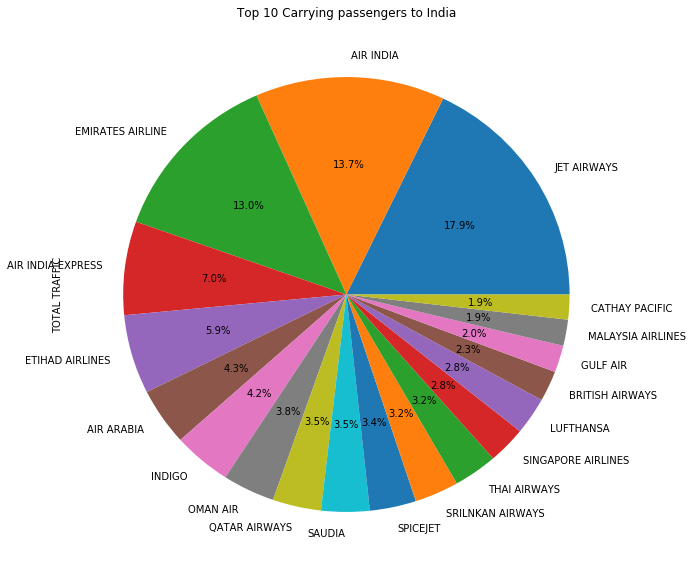

In [2]:
df_traffic_monthly = pd.read_csv("../input/international-air-traffic-from-and-to-india/Airlinewise Monthly International Air Traffic To And From The Indian Territory.csv")

df_traffic_passengers = df_traffic_monthly[(df_traffic_monthly['PASSENGERS FROM INDIA'] > 0) | (df_traffic_monthly['PASSENGERS TO INDIA'] > 0)]

df_traffic_passengers_to = df_traffic_passengers.groupby(['AIRLINE NAME'])['PASSENGERS TO INDIA'].sum().nlargest(20).reset_index(name='TO COUNT')

df_traffic_passengers_from = df_traffic_passengers.groupby(['AIRLINE NAME'])['PASSENGERS FROM INDIA'].sum().nlargest(20).reset_index(name='FROM COUNT')

df_traffic_passengers_combined = pd.merge(df_traffic_passengers_to, df_traffic_passengers_from, on='AIRLINE NAME')
df_traffic_passengers_combined['TOTAL TRAFFIC'] = df_traffic_passengers_combined['FROM COUNT'] + df_traffic_passengers_combined['TO COUNT']
df_traffic_passengers_combined['OUTBOUND TO INBOUND RATIO'] = df_traffic_passengers_combined['FROM COUNT'] / df_traffic_passengers_combined['TO COUNT']
df_traffic_passengers_combined.plot(x='AIRLINE NAME', y='TOTAL TRAFFIC', kind='pie', legend=False, autopct='%1.1f%%', labels=df_traffic_passengers_to['AIRLINE NAME'], figsize=(10, 10), title='Top 10 Carrying passengers to India')

df_traffic_passengers_combined

# **Passenger Traffic monthwise and quarter wise**
1. Q1 is undoubtedly the best quarter for air traffic in India
2. There is not much difference when we look at other quarter numbers.

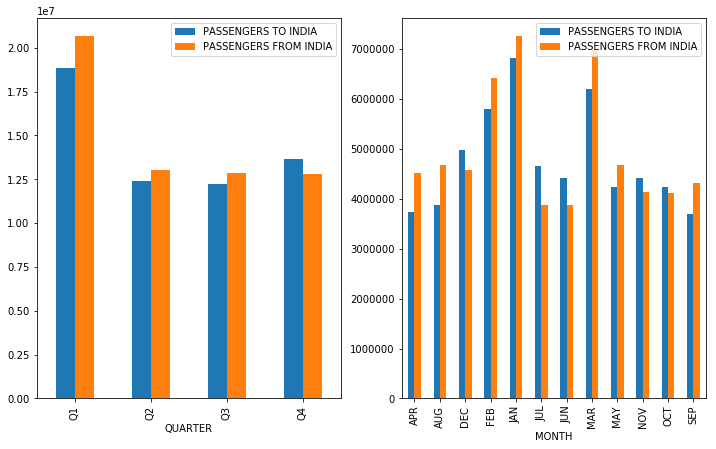

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df_qtrly = df_traffic_passengers.groupby(['QUARTER'])['PASSENGERS TO INDIA', 'PASSENGERS FROM INDIA'].sum().reset_index()
df_qtrly.plot(x='QUARTER', y=['PASSENGERS TO INDIA', 'PASSENGERS FROM INDIA'], kind='bar', ax=axes[0], figsize=(12, 7))

df_monthly = df_traffic_passengers.groupby(['MONTH'])['PASSENGERS TO INDIA', 'PASSENGERS FROM INDIA'].sum().reset_index()
df_monthly.plot(x='MONTH', y=['PASSENGERS TO INDIA', 'PASSENGERS FROM INDIA'], kind='bar', ax=axes[1], figsize=(12, 7))

# **Rate of change of passenger traffic **
1. We already saw that Q1 has a lion's share of passenger traffic to and from India
2. Looking at Q1 numbers over 3 years, we can see that passenger traffic has been increasing both ways. 
3. Passengers flying in to India has increased by 18.5% over 3 years whereas Passngers flying out from India has increased by 16.3%. 
4. What could the 2 % increase in traffic inflow mean? - More jobs created in India? or More jobs lost for Indians abroad?

,YEAR,QUARTER,PASSENGERS TO INDIA,PASSENGERS FROM INDIA
0,2015,Q1,5712230.0,6376365
4,2016,Q1,6343530.0,6871288
8,2017,Q1,6778304.0,7424671


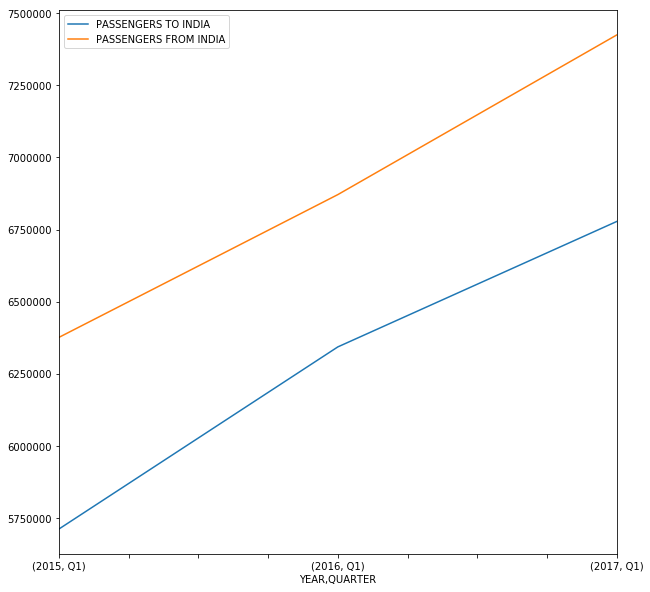

In [4]:
df_yearly = df_traffic_passengers.groupby(['YEAR', 'QUARTER'])['PASSENGERS TO INDIA', 'PASSENGERS FROM INDIA'].sum().reset_index()
df_yearly = df_yearly[df_yearly['QUARTER'] == 'Q1']
df_yearly.plot(x=['YEAR', 'QUARTER'], y=['PASSENGERS TO INDIA', 'PASSENGERS FROM INDIA'], kind='line', figsize=(10, 10))
df_yearly

# **Quarterly traffic of top 10 airlines**
1. The top 4 remain the same during all 4 quarters.
2. Infact the ratio of traffic between the top 10 airlines is almost the same 
3. Qatar Airways earns a spot in the top 10 in the last quarter.


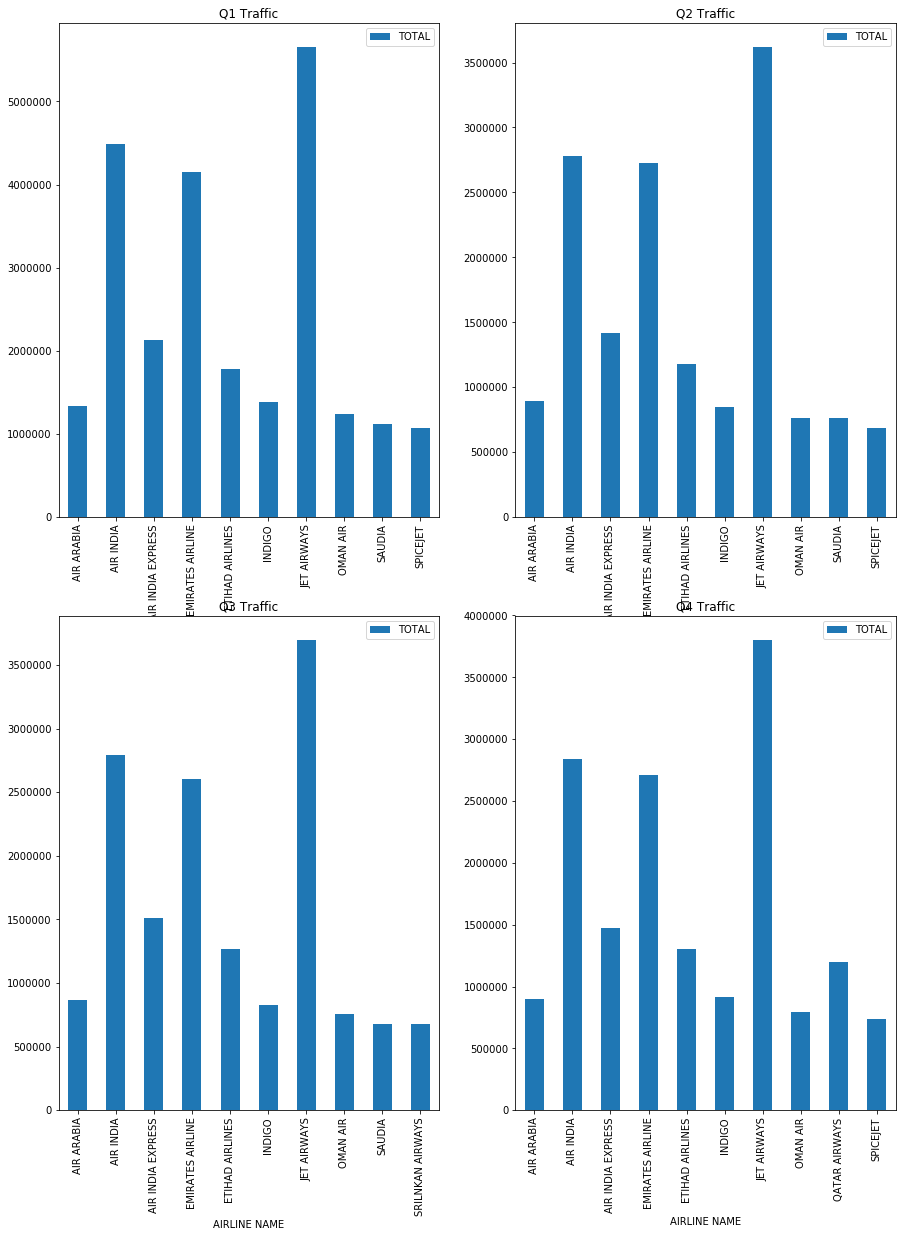

In [5]:
df_qtrly_airlines = df_traffic_passengers.groupby(['QUARTER', 'AIRLINE NAME'])['PASSENGERS TO INDIA', 'PASSENGERS FROM INDIA'].sum().reset_index()
df_qtrly_airlines['TOTAL'] = df_qtrly_airlines['PASSENGERS TO INDIA'] + df_qtrly_airlines['PASSENGERS FROM INDIA'] 

df_airlines_q1 = df_qtrly_airlines[df_qtrly_airlines['QUARTER'] == 'Q1']
df_q1_airlines_top10 = df_airlines_q1[df_airlines_q1['TOTAL'].isin(df_airlines_q1['TOTAL'].nlargest(10))]

df_airlines_q2 = df_qtrly_airlines[df_qtrly_airlines['QUARTER'] == 'Q2']
df_q2_airlines_top10 = df_airlines_q2[df_airlines_q2['TOTAL'].isin(df_airlines_q2['TOTAL'].nlargest(10))]

df_airlines_q3 = df_qtrly_airlines[df_qtrly_airlines['QUARTER'] == 'Q3']
df_q3_airlines_top10 = df_airlines_q3[df_airlines_q3['TOTAL'].isin(df_airlines_q3['TOTAL'].nlargest(10))]

df_airlines_q4 = df_qtrly_airlines[df_qtrly_airlines['QUARTER'] == 'Q4']
df_q4_airlines_top10 = df_airlines_q4[df_airlines_q4['TOTAL'].isin(df_airlines_q4['TOTAL'].nlargest(10))]

fig, axes = plt.subplots(nrows=2, ncols=2)

df_q1_airlines_top10.plot(x='AIRLINE NAME', y=['TOTAL'], kind='bar', ax=axes[0,0], figsize=(15, 20), title = 'Q1 Traffic')
df_q2_airlines_top10.plot(x='AIRLINE NAME', y=['TOTAL'], kind='bar', ax=axes[0,1], title = 'Q2 Traffic')
df_q3_airlines_top10.plot(x='AIRLINE NAME', y=['TOTAL'], kind='bar', ax=axes[1,0], title = 'Q3 Traffic')
df_q4_airlines_top10.plot(x='AIRLINE NAME', y=['TOTAL'], kind='bar', ax=axes[1,1], title = 'Q4 Traffic')

# **Now let's look at City wise traffic which throws light on departure and arrival airports.**
1. CITY1 -> Foreign City Airport
2. CITY2 -> Airport in India

Please take a look at the table that depicts the above information

In [6]:
df_citywise = pd.read_csv("../input/international-air-traffic-from-and-to-india/Citypairwise Quarterly International  Air Traffic To And From The Indian Territory.csv", error_bad_lines=False, warn_bad_lines=False)
df_citywise = df_citywise.iloc[:, :-3]

In [7]:
df_citywise['TOTAL TRAFFIC'] = df_citywise['PASSENGERS FROM CITY1 TO CITY2'] + df_citywise['PASSENGERS FROM CITY2 TO CITY1']
df_citywise.head(10)

,YEAR,QUARTER,CITY1,CITY2,PASSENGERS FROM CITY1 TO CITY2,PASSENGERS FROM CITY2 TO CITY1,TOTAL TRAFFIC
0,2015,Q1,ABUDHABI,AHMEDABAD,12764,15358,28122
1,2015,Q1,ABUDHABI,BENGALURU,27341,35988,63329
2,2015,Q1,ABUDHABI,CHENNAI,31756,32593,64349
3,2015,Q1,ABUDHABI,DELHI,66416,65956,132372
4,2015,Q1,ABUDHABI,GOA,8408,12593,21001
5,2015,Q1,ABUDHABI,HYDERABAD,37265,44645,81910
6,2015,Q1,ABUDHABI,JAIPUR,9437,10859,20296
7,2015,Q1,ABUDHABI,KOCHI,34055,41972,76027
8,2015,Q1,ABUDHABI,KOLKATA,1580,1799,3379
9,2015,Q1,ABUDHABI,KOZHIKODE,31618,41032,72650


# **Top 100 airport pairs with highest traffic inflow and outflow combined**
Below is a snapshot of 20 of them

In [8]:
df_citywise_top100 = df_citywise[df_citywise['TOTAL TRAFFIC'].isin(df_citywise['TOTAL TRAFFIC'].nlargest(100))]
df_citywise_top100.head(20)

,YEAR,QUARTER,CITY1,CITY2,PASSENGERS FROM CITY1 TO CITY2,PASSENGERS FROM CITY2 TO CITY1,TOTAL TRAFFIC
42,2015,Q1,BANGKOK,MUMBAI,90096,94099,184195
93,2015,Q1,DUBAI,CHENNAI,102190,118103,220293
94,2015,Q1,DUBAI,DELHI,218394,218530,436924
96,2015,Q1,DUBAI,HYDERABAD,99989,112952,212941
98,2015,Q1,DUBAI,KOCHI,99921,114833,214754
104,2015,Q1,DUBAI,MUMBAI,260038,300106,560144
141,2015,Q1,KATHMANDU,DELHI,91764,86994,178758
172,2015,Q1,LONDON,DELHI,122349,122506,244855
174,2015,Q1,LONDON,MUMBAI,83375,94554,177929
266,2015,Q1,SINGAPORE,CHENNAI,88291,100794,189085


# **Graphical depiction of busiest airport pairs**
1. Dubai - Mumbai is arguably the busiest route with a whopping 4.5 million passengers flying both ways in 3 years
2. Take a look a the table below the graph. Flights fly in and out of Dubai to 5 Indian cities of the top 10 airport pairs.
3. A considerable number of flights fly in an out of London and (Delhi, Mumbai)


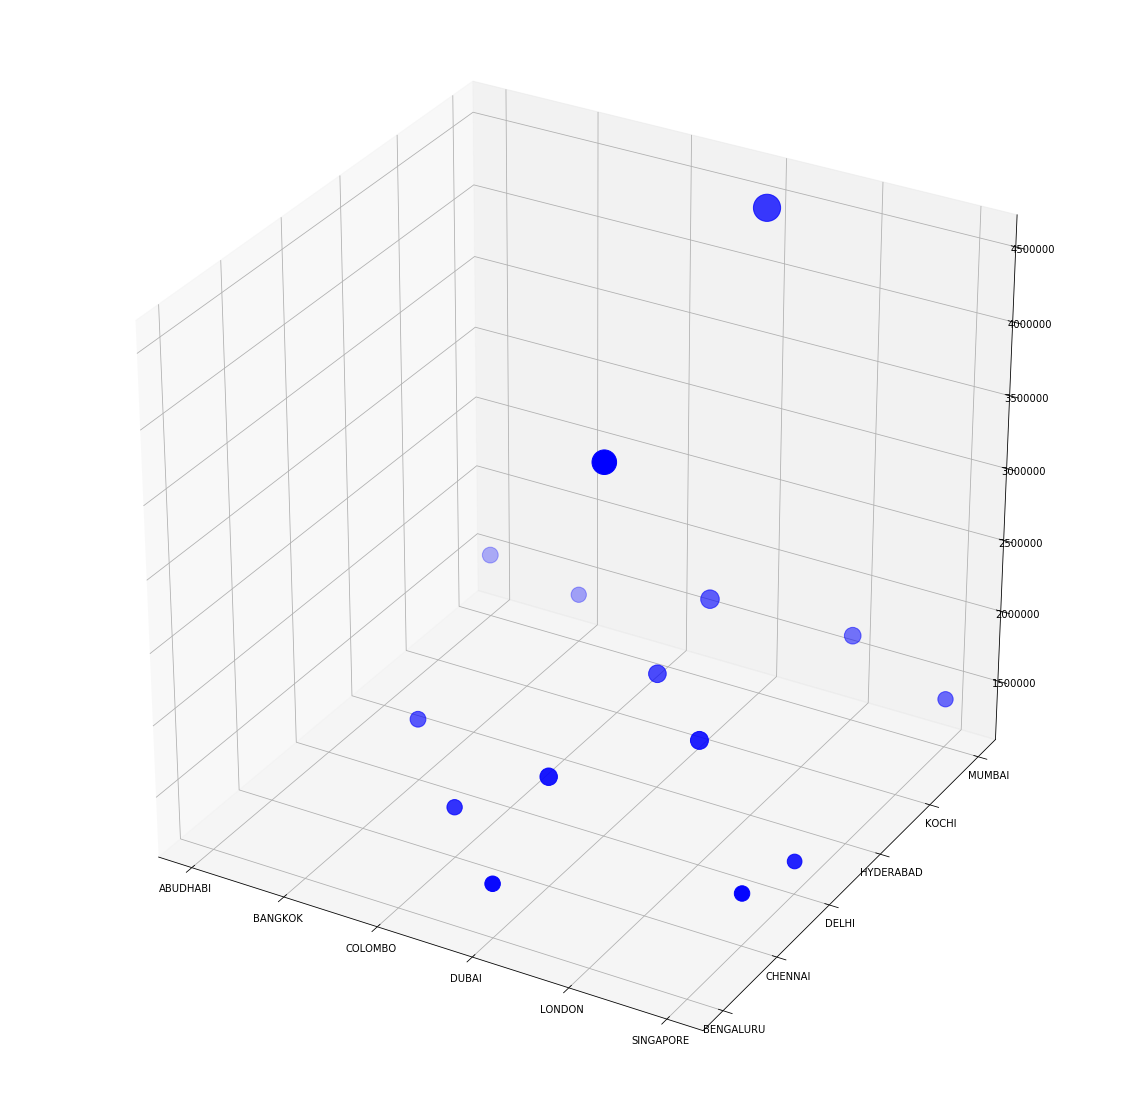

,CITY1,CITY2,TOTAL TRAFFIC,TOTAL TRAFFIC SCALED
0,DUBAI,MUMBAI,4480329,739.172089
1,DUBAI,DELHI,3659375,603.729740
2,DUBAI,KOCHI,2085457,344.062145
3,LONDON,DELHI,1953307,322.259820
4,DUBAI,HYDERABAD,1886814,311.289695
5,DUBAI,CHENNAI,1846427,304.626581
6,LONDON,MUMBAI,1686086,278.173257
7,ABUDHABI,MUMBAI,1524384,251.495394
8,BANGKOK,DELHI,1511137,249.309882
9,DUBAI,BENGALURU,1455623,240.151090


In [9]:
df_citywise_cumulative_traffic = df_citywise.groupby(['CITY1', 'CITY2'])['TOTAL TRAFFIC'].sum().nlargest(15).reset_index()
highest_traffic = np.max(df_citywise['TOTAL TRAFFIC'])
uniqueCity1, city1Ints = np.unique(df_citywise_cumulative_traffic['CITY1'], return_inverse=True)
uniqueCity2, city2Ints = np.unique(df_citywise_cumulative_traffic['CITY2'], return_inverse=True)


df_citywise_cumulative_traffic['TOTAL TRAFFIC SCALED'] = (df_citywise_cumulative_traffic['TOTAL TRAFFIC'] / highest_traffic) * 100


fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(city1Ints, city2Ints, df_citywise_cumulative_traffic['TOTAL TRAFFIC'], s=df_citywise_cumulative_traffic['TOTAL TRAFFIC SCALED'], c='b')
ax.set(xticks=range(len(uniqueCity1)), xticklabels=uniqueCity1,
       yticks=range(len(uniqueCity2)), yticklabels=uniqueCity2) 
plt.show()

df_citywise_cumulative_traffic.head(10)

# Flight map of all traffic flowing in and out of India

1. Find out all unique cities from the citywise csv and geocode them to find their latitude and longitude. I used  [GeoPy](https://github.com/geopy/geopy) for achieving this. 
2. Once I have lat, long information of arrival and departure airports, I used the [Flight Visualization with Pandas and Matplotlib](https://blog.hugo-larcher.com/flight-data-visualisation-with-pandas-and-matplotlib-ebbd13038647) by Hugo Larcher.
3. Combining the two, the visualization of flight data of our dataset can be viewed.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in greater


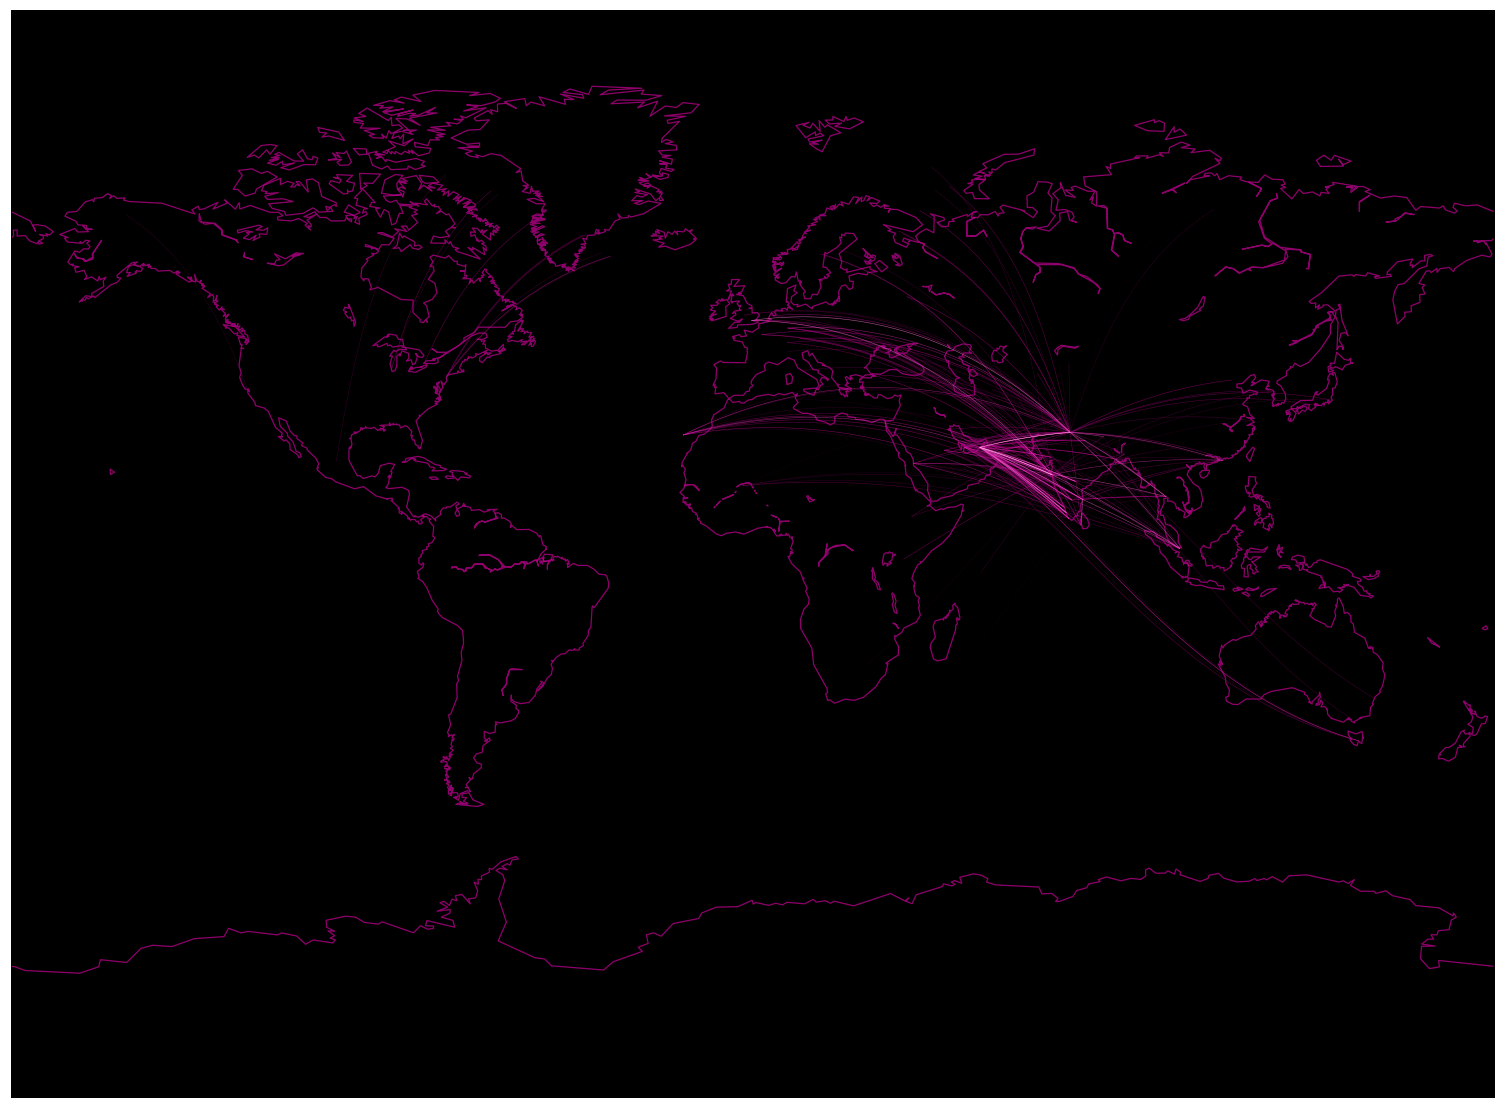

In [10]:
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import Normalize, LinearSegmentedColormap, PowerNorm

def plot_map(in_filename, color_mode='screen',
             out_filename='flights_map_mpl.png', absolute=False):
    if color_mode == 'screen':
        bg_color = (0.0, 0.0, 0, 1.0)
        coast_color = (204/255.0, 0, 153/255.0, 0.7)
        color_list = [(0.0, 0.0, 0.0, 0.0),
                      (204/255.0, 0, 153/255.0, 0.6),
                      (255/255.0, 204/255.0, 230/255.0, 1.0)]
    else:
        bg_color = (1.0, 1.0, 1.0, 1.0)
        coast_color = (10.0/255.0, 10.0/255.0, 10/255.0, 0.8)
        color_list = [(1.0, 1.0, 1.0, 0.0),
                      (255/255.0, 204/255.0, 230/255.0, 1.0),
                      (204/255.0, 0, 153/255.0, 0.6)
                      ]

    # define the expected CSV columns
    CSV_COLS = ('dep_lat', 'dep_lon', 'arr_lat', 'arr_lon',
                'nb_flights', 'CO2')

    routes = pd.read_csv(in_filename, names=CSV_COLS, na_values=['\\N'],
                         sep=',', skiprows=1)


    num_routes = len(routes.index)

    # normalize the dataset for color scale
    norm = PowerNorm(0.3, routes['nb_flights'].min(),
                     routes['nb_flights'].max())
    # norm = Normalize(routes['nb_flights'].min(), routes['nb_flights'].max())

    # create a linear color scale with enough colors
    if absolute:
        n = routes['nb_flights'].max()
    else:
        n = num_routes
    cmap = LinearSegmentedColormap.from_list('cmap_flights', color_list,
                                             N=n)
    # create the map and draw country boundaries
    plt.figure(figsize=(27, 20))
    m = Basemap(projection='mill', lon_0=0)
    
    m.drawcoastlines(color=coast_color, linewidth=1.25)
    m.fillcontinents(color=bg_color, lake_color=bg_color)
    m.drawmapboundary(fill_color=bg_color)

    # plot each route with its color depending on the number of flights
    for i, route in enumerate(routes.sort_values(by='nb_flights',
                              ascending=True).iterrows()):
        route = route[1]
        if absolute:
            color = cmap(norm(int(route['nb_flights'])))
        else:
            color = cmap(i * 1.0 / num_routes)

        line, = m.drawgreatcircle(route['dep_lon'], route['dep_lat'],
                                  route['arr_lon'], route['arr_lat'],
                                  linewidth=0.5, color=color)
        # if the path wraps the image, basemap plots a nasty line connecting
        # the points at the opposite border of the map.
        # we thus detect path that are bigger than 30km and split them
        # by adding a NaN
        path = line.get_path()
        cut_point, = np.where(np.abs(np.diff(path.vertices[:, 0])) > 30000e3)
        if len(cut_point) > 0:
            cut_point = cut_point[0]
            vertices = np.concatenate([path.vertices[:cut_point, :],
                                      [[np.nan, np.nan]],
                                      path.vertices[cut_point+1:, :]])
            path.codes = None  # treat vertices as a serie of line segments
            path.vertices = vertices

    # save the map
    plt.show()

plot_map('../input/airtrafficcoordinatesindia/flight_data.csv', 'screen', absolute=True)